# EV Clustering

In [440]:
%matplotlib notebook
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import progressbar

import os
from glob import glob

## Import jsons

In [442]:
def convert_to_datetime(x): 
    """
    input: get a timestamp as a string
    return: a readable timestamp
    """
    date, time, time_ns = x.split('_')    
    return pd.to_datetime(date + ' ' + time + '.' + time_ns)

def import_trasient_from_file(url_of_folder):
    """
    input: get a url where the function can find the files to import
    The function tranform the import files to on pandas dataframe
    return: a dataframe
    """
    append_data = []
    
    # find out how many files in the folder
    list = os.listdir(url_of_folder)
    number_files = len(list)
    
    bar = progressbar.ProgressBar()
    with progressbar.ProgressBar(max_value=number_files) as bar:
        for i, file_name in enumerate(glob(url_of_folder + '*.json')):
            data = pd.read_json(file_name)
            append_data.append(data)
            bar.update(i)
        all_data_as_data_frame = pd.concat(append_data, axis=1).transpose()
        only_trasients = all_data_as_data_frame[all_data_as_data_frame["transient_flag"] == "true"] \
                                .reset_index() \
                                .drop(['index','transient_flag'], 1)
        # convert object types to float, timestamp, int
        only_trasients['begin_timestamp_string'] = only_trasients['begin_timestamp_string'].apply(convert_to_datetime)
        only_trasients[['begin_index','begin_timestamp_float','phase_num','transient_rise_gradient']] \
                = only_trasients[['begin_index','begin_timestamp_float','phase_num','transient_rise_gradient']] \
                                .apply(pd.to_numeric)
    return only_trasients

In [443]:
%time data = import_trasient_from_file("jsons/")

100% (1370 of 1370) |#####################| Elapsed Time: 0:00:19 Time: 0:00:19


CPU times: user 15.9 s, sys: 5 s, total: 20.9 s
Wall time: 21.3 s


## Explore the data

In [444]:
data.head()

,begin_index,begin_timestamp_float,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient
0,701,1.491027e+09,2017-01-04 08:01:41.529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",2.458070e+05
1,806,1.491027e+09,2017-01-04 08:14:53.521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",1.951086e+05
2,5717,1.491073e+09,2017-01-04 20:57:48.799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",2.423178e+05
3,2750,1.488462e+09,2017-02-03 14:42:56.465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",-2.846197e+06
4,9697,1.488462e+09,2017-02-03 14:45:31.804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",-1.692315e+06


In [446]:
filtered_signal_test = data["filtered_signal"][0]

In [447]:
raw_signal_voltage = np.asarray(data["raw_signal_voltage"][0])

In [448]:
from scipy import signal

F1 = raw_signal_voltage

# create sinus
F2 = np.sqrt(2)*230*np.sin(X)

# compute the analytic signal, using the Hilbert transform
f1h = scipy.signal.hilbert(F1)
f2h = scipy.signal.hilbert(F2)

# calculate the phase difference
c = scipy.inner(f1h, np.conj(f2h))/np.sqrt(scipy.inner(f1h,np.conj(f1h))*scipy.inner(f2h,np.conj(f2h)))
phase_diff = np.angle(c)
print("The phase difference is: {}.".format(phase_diff))

The phase difference is: 1.0650633058707824.


<IPython.core.display.Javascript object>


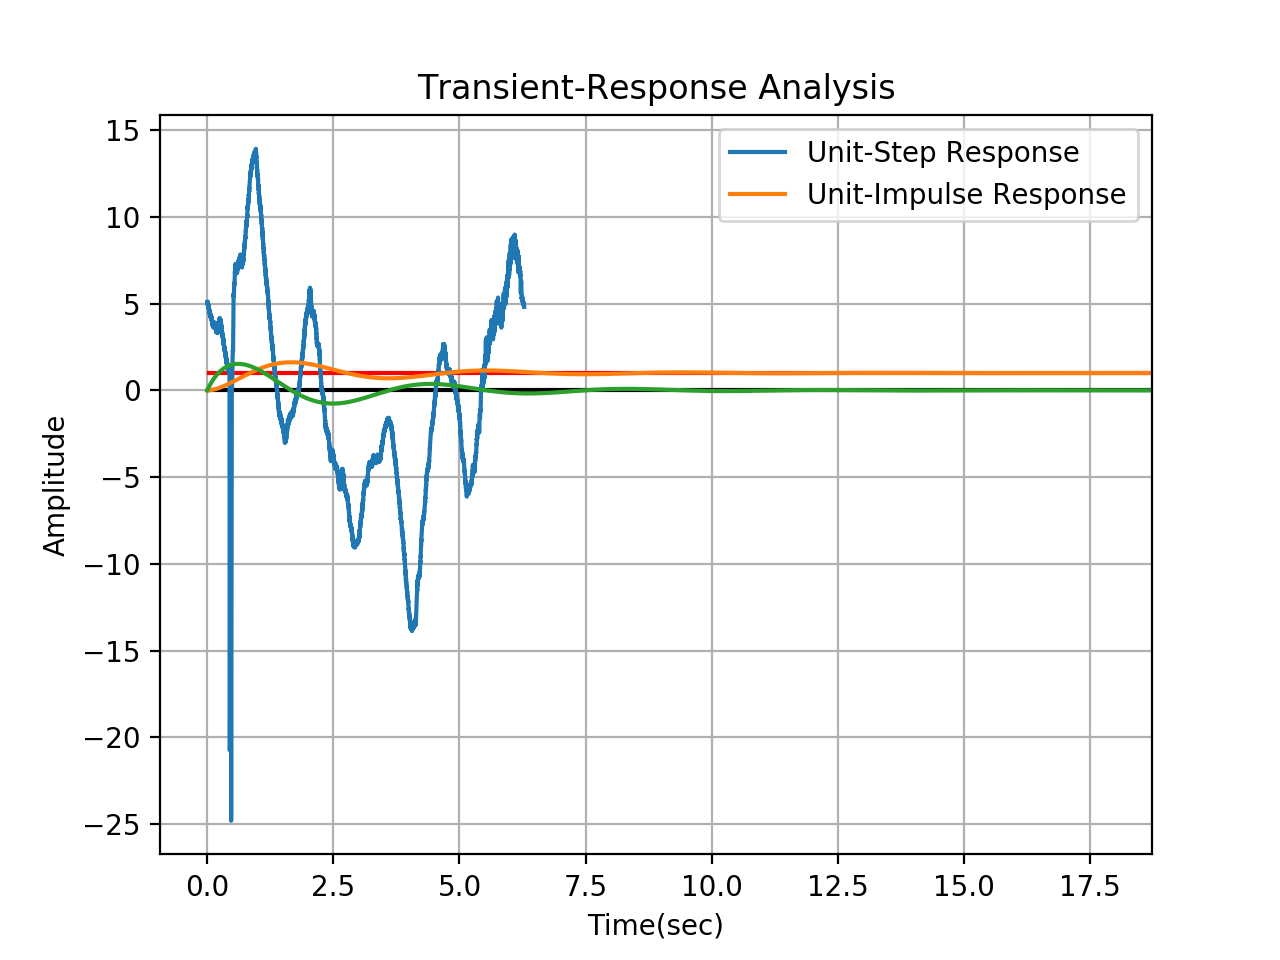

In [166]:
lengh = len(raw_signal_voltage)
X2 = np.linspace(0, 2*np.pi, len(raw_signal_voltage), endpoint=True)

X = np.linspace(0, 2*np.pi, len(raw_signal_voltage), endpoint=True)
F = np.sqrt(2)*230*np.sin(X+1.0650633058707824)

F2 = raw_signal_voltage - F
plt.plot(X2,F2)

plt.show()

In [105]:
'''X1 = np.linspace(0, 2*np.pi, len(filtered_signal_test))
F1 = filtered_signal_test
plt.plot(X1,F1)

plt.show()'''

'X1 = np.linspace(0, 2*np.pi, len(filtered_signal_test))\nF1 = filtered_signal_test\nplt.plot(X1,F1)\n\nplt.show()'

In [85]:
'''X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F = np.sqrt(2)*230*np.sin(X + 1)
plt.plot(X,F)

startx, endx = -0.1, 2*np.pi + 0.1
starty, endy = -340, 340

plt.axis([startx, endx, starty, endy])
plt.show()'''

'X = np.linspace(0, 2 * np.pi, 50, endpoint=True)\nF = np.sqrt(2)*230*np.sin(X + 1)\nplt.plot(X,F)\n\nstartx, endx = -0.1, 2*np.pi + 0.1\nstarty, endy = -340, 340\n\nplt.axis([startx, endx, starty, endy])\nplt.show()'

In [34]:
data.head(50)

,begin_index,begin_timestamp_float,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_flag,transient_rise_gradient
0,701,1491026501.529732,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",true,245806.99751296898
1,806,1491027293.5211477,01-04-2017_08:14:53_521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",true,195108.60796327944
2,5717,1491073068.7990358,01-04-2017_20:57:48_799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",true,242317.78658353366
3,2750,1488462176.4657116,02-03-2017_14:42:56_465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",true,-2846197.144528243
4,9697,1488462331.804547,02-03-2017_14:45:31_804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",true,-1692314.9426778157
5,435,1488462331.8060212,02-03-2017_14:45:31_806021,"[0.10735161280000001, 0.093923882, -0.04026190...",3,"[2.9296875, 2.8991699219, 2.8533935547000002, ...","[-298.5016479492, -298.3405761719, -298.125854...","[20.426, 8.952, 1.933]","[449, 2961, 6998]",true,-711292.8090230712
6,8744,1488468637.2393005,02-03-2017_16:30:37_239300,"[-0.5327860288, -0.5853679045, -0.3247146155, ...",1,"[-4.2572021484, -4.39453125, -4.39453125, -4.4...","[0.3640657961, 0.2080375999, -0.0260047, -0.24...","[40.473, 17.702, 7.373]","[8753, 8792, 8836]",true,2233549.894180057
7,3055,1488470421.7145753,02-03-2017_17:00:21_714575,"[0.2854228914, 0.1826147139, 0.0645840988, -0....",1,"[4.3182373047, 4.3182373047, 4.302978515599999...","[-0.6371151209, -0.2990540564, 0.0780140981, 0...","[55.842, 19.208, 6.912]","[3065, 3144, 3658]",true,2792014.8849487305
8,3057,1488470421.7145793,02-03-2017_17:00:21_714579,"[0.2060560286, 0.1929426789, 0.2864884138, 0.2...",3,"[7.2937011719000004, 7.2784423828, 7.186889648...","[292.7978820801, 292.7442016602, 292.516021728...","[21.792, 9.186, 5.343]","[3064, 3092, 3149]",true,1538662.6379830497
9,5692,1488477704.541767,02-03-2017_19:01:44_541767,"[-0.0903187394, -0.1313503087, -0.1033982262, ...",2,"[-1.0833740234, -1.0528564453, -1.0833740234, ...","[-293.008026123, -293.1896972656, -293.1637268...","[28.069, 4.650, 3.875]","[5744, 5825, 5916]",true,267649.5772141676


## Preprossing Data and Feature extraction

The Problem with time series is, that they are high dimensional. Therefore it's important to extract features from this time series to reduce the dimensions of the data. So the next step is to preprocessing our data, that we can extract features from this Dataframe. We will create a Dataframe for the current/voltage signals.

### Create Feature Dataframe from exist features

In [456]:
data.three_first_peaks[0][0]

'26.198'

In [457]:
data.head(50)

,begin_index,begin_timestamp_float,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient
0,701,1.491027e+09,2017-01-04 08:01:41.529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",2.458070e+05
1,806,1.491027e+09,2017-01-04 08:14:53.521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",1.951086e+05
2,5717,1.491073e+09,2017-01-04 20:57:48.799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",2.423178e+05
3,2750,1.488462e+09,2017-02-03 14:42:56.465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",-2.846197e+06
4,9697,1.488462e+09,2017-02-03 14:45:31.804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",-1.692315e+06
5,435,1.488462e+09,2017-02-03 14:45:31.806021,"[0.10735161280000001, 0.093923882, -0.04026190...",3,"[2.9296875, 2.8991699219, 2.8533935547000002, ...","[-298.5016479492, -298.3405761719, -298.125854...","[20.426, 8.952, 1.933]","[449, 2961, 6998]",-7.112928e+05
6,8744,1.488469e+09,2017-02-03 16:30:37.239300,"[-0.5327860288, -0.5853679045, -0.3247146155, ...",1,"[-4.2572021484, -4.39453125, -4.39453125, -4.4...","[0.3640657961, 0.2080375999, -0.0260047, -0.24...","[40.473, 17.702, 7.373]","[8753, 8792, 8836]",2.233550e+06
7,3055,1.488470e+09,2017-02-03 17:00:21.714575,"[0.2854228914, 0.1826147139, 0.0645840988, -0....",1,"[4.3182373047, 4.3182373047, 4.302978515599999...","[-0.6371151209, -0.2990540564, 0.0780140981, 0...","[55.842, 19.208, 6.912]","[3065, 3144, 3658]",2.792015e+06
8,3057,1.488470e+09,2017-02-03 17:00:21.714579,"[0.2060560286, 0.1929426789, 0.2864884138, 0.2...",3,"[7.2937011719000004, 7.2784423828, 7.186889648...","[292.7978820801, 292.7442016602, 292.516021728...","[21.792, 9.186, 5.343]","[3064, 3092, 3149]",1.538663e+06
9,5692,1.488478e+09,2017-02-03 19:01:44.541767,"[-0.0903187394, -0.1313503087, -0.1033982262, ...",2,"[-1.0833740234, -1.0528564453, -1.0833740234, ...","[-293.008026123, -293.1896972656, -293.1637268...","[28.069, 4.650, 3.875]","[5744, 5825, 5916]",2.676496e+05


In [528]:
def create_feature(x):
    #print(data_input)
    x, y = x[0], x[1]
    return [x, y]

In [529]:
test = pd.DataFrame(columns=['test','test2'])

In [530]:
test[['test','test2']] = data[['begin_index','begin_timestamp_float']].apply(create_feature, axis=1)

In [531]:
test

,test,test2
0,701.0,1.491027e+09
1,806.0,1.491027e+09
2,5717.0,1.491073e+09
3,2750.0,1.488462e+09
4,9697.0,1.488462e+09
5,435.0,1.488462e+09
6,8744.0,1.488469e+09
7,3055.0,1.488470e+09
8,3057.0,1.488470e+09
9,5692.0,1.488478e+09


In [459]:

# add peaks to the feature_df
feature_df = pd.DataFrame([])
%time feature_df[['peak_1','peak_2','peak_3']] = pd.DataFrame([peak for peak in data.three_first_peaks])
# add transient_rise_gradient
feature_df["transient_rise_gradient"] = data["transient_rise_gradient"].copy()

CPU times: user 4.18 ms, sys: 418 µs, total: 4.6 ms
Wall time: 4.32 ms


In [177]:
Z = linkage(feature_df, 'ward')

In [178]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(feature_df))
c

0.68034015253242963

In [183]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

<IPython.core.display.Javascript object>


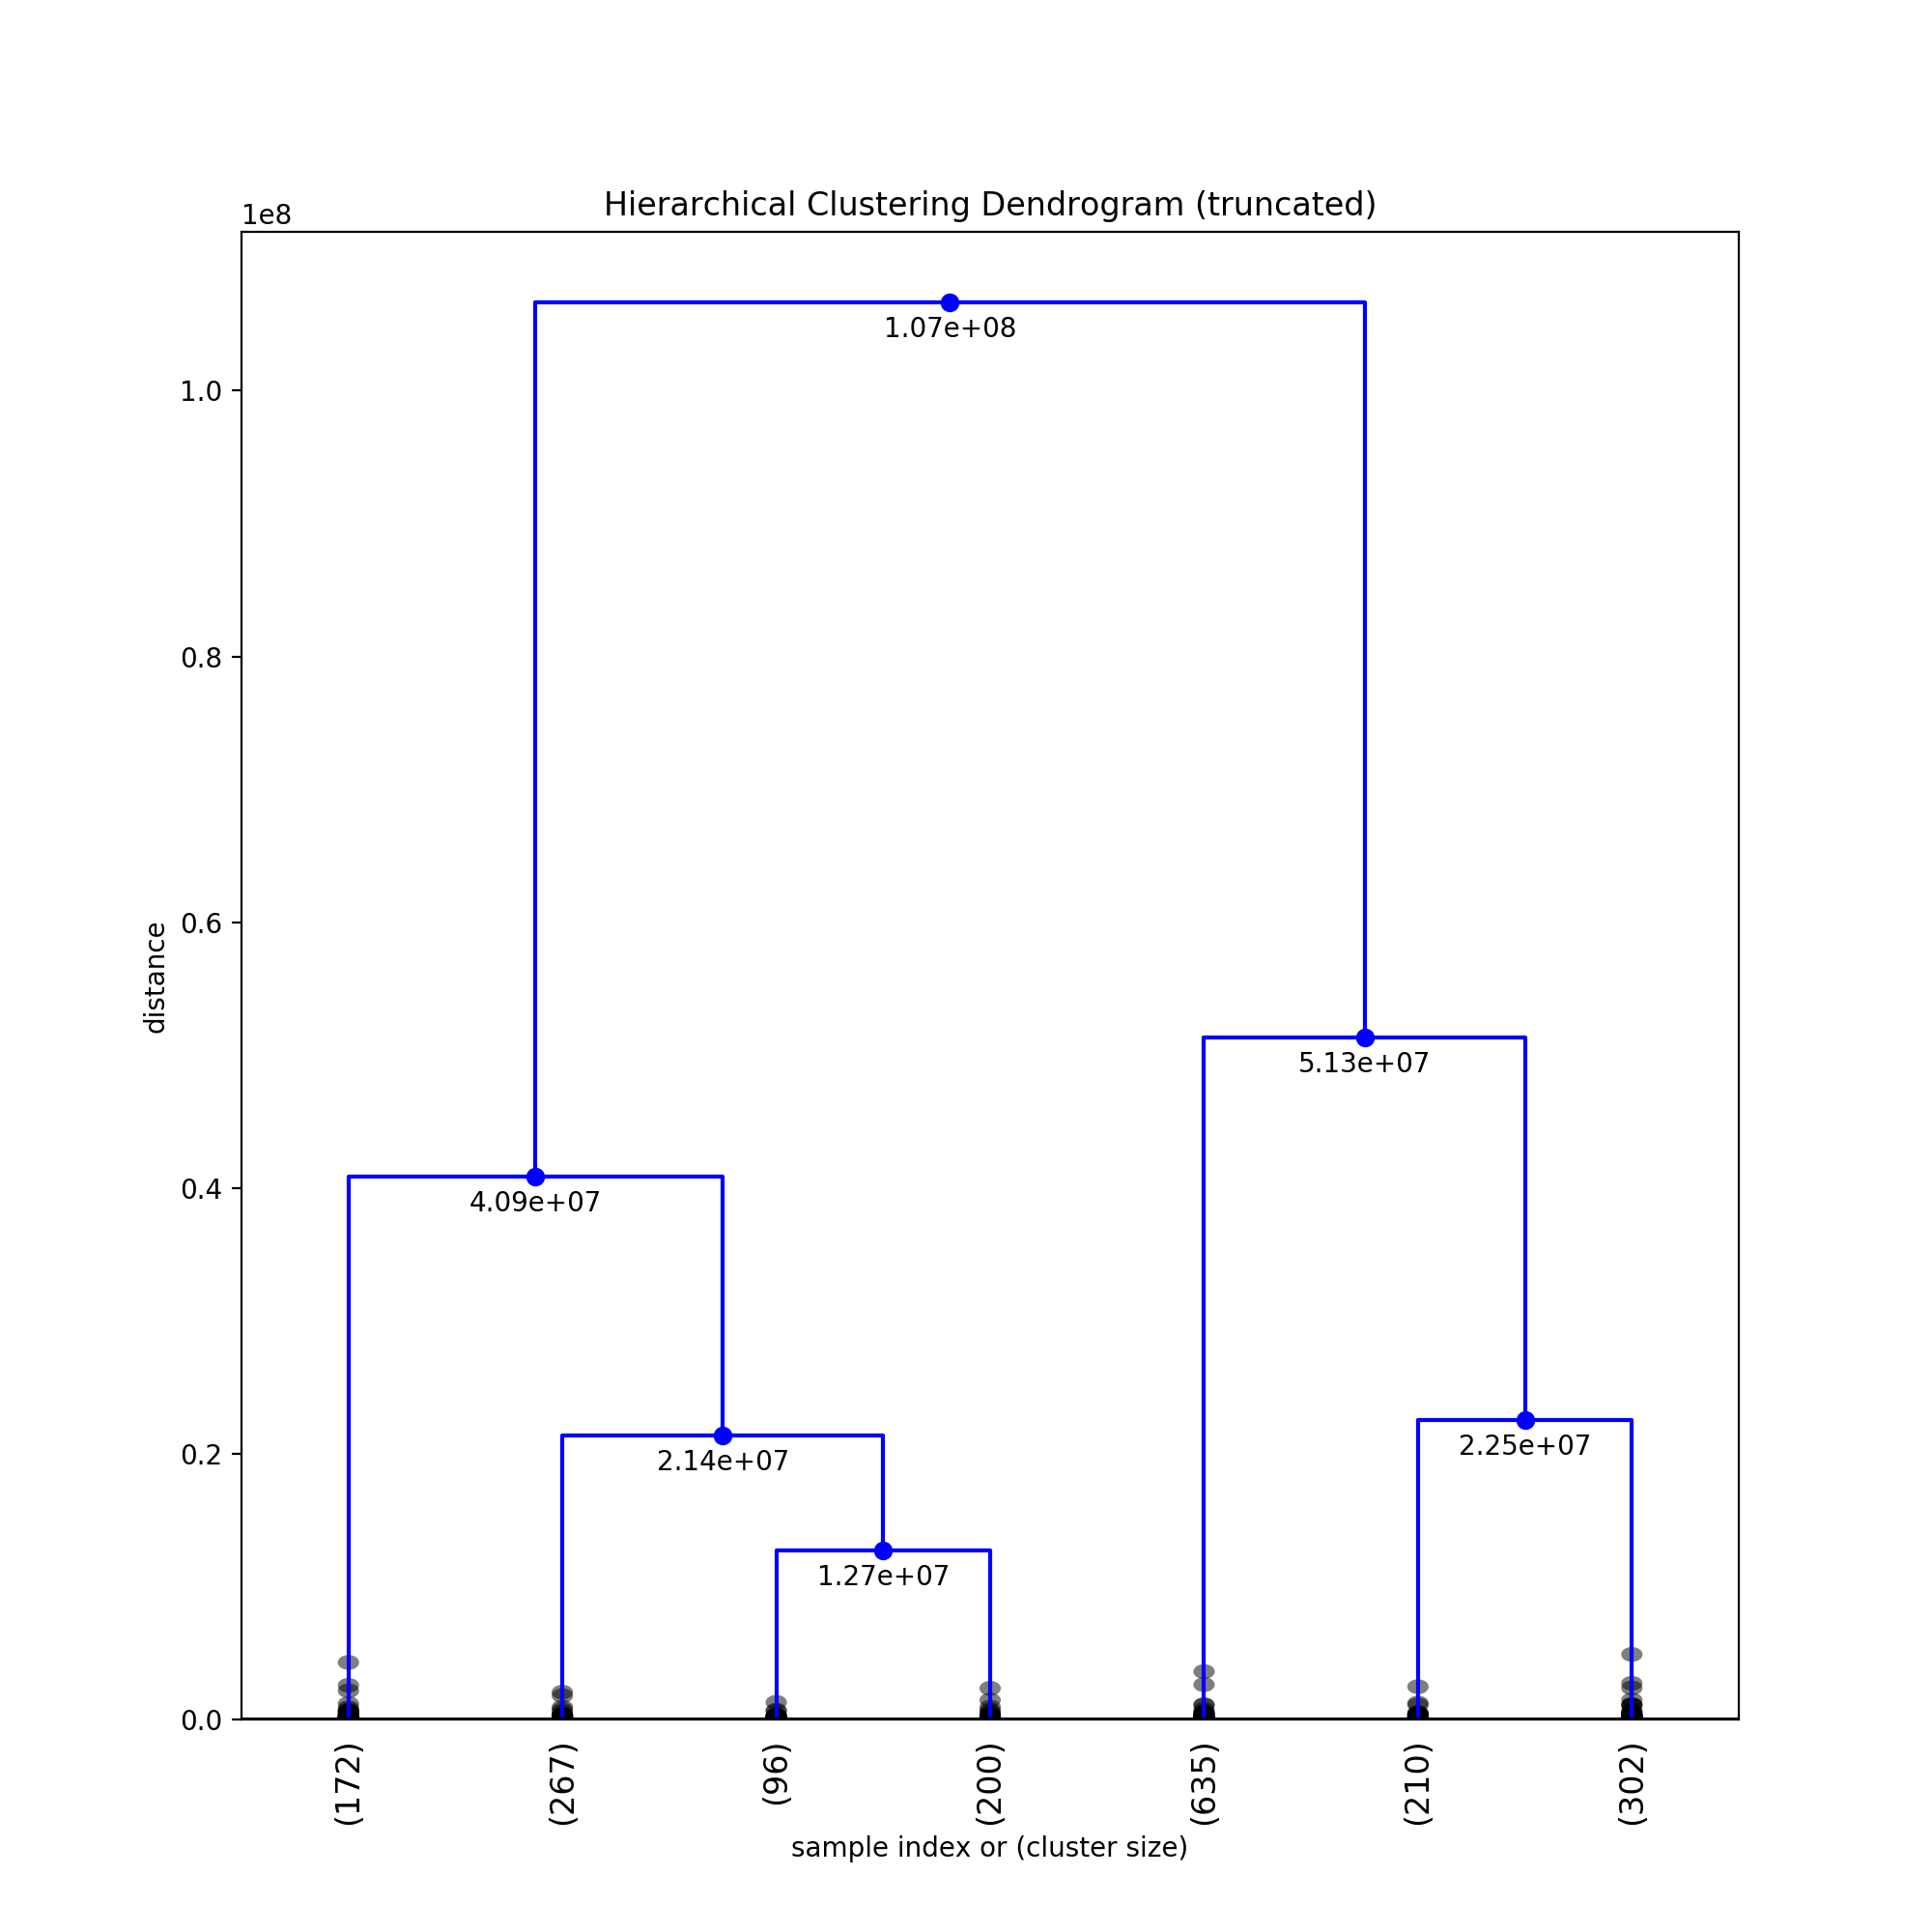

In [191]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=7,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
)
plt.show()

In [8]:
# create trasient data frame
raw_signal_current = data["raw_signal_current"]
raw_signal_voltage = data["raw_signal_voltage"]

# create dataframes
# on row contains on time series
# column is time or dimension
df_raw_signal_current = pd.DataFrame([x for x in raw_signal_current])
df_raw_signal_voltage = pd.DataFrame([x for x in raw_signal_voltage])

In [9]:
df_raw_signal_current.head(1)

,0,1,2,3,4,5,6,7,8,9,...,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025
0,0.656128,0.701904,0.762939,0.701904,0.686646,0.762939,0.732422,0.686646,0.717163,0.686646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_raw_signal_voltage.head(1)

,0,1,2,3,4,5,6,7,8,9,...,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025
0,289.647278,289.699188,289.802979,289.828949,289.932739,290.04953,290.10144,290.270111,290.373932,290.490723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clustering

### Extract Features Voltage (mit tsfresh)

Quelle Bild:
https://tsfresh.readthedocs.io/en/latest/_images/feature_extraction_process_20160815_mc_1.png

In [11]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import FeatureExtractionSettings

extraction_settings = FeatureExtractionSettings()
extraction_settings.IMPUTE = impute    # Fill in Infs and NaNs

# transpose since tsfresh reads times series data column-wise, not row-wise
df_raw_signal_voltage_t = df_raw_signal_voltage.copy().transpose()
df_raw_signal_voltage_t_cut = df_raw_signal_voltage_t[:100]

print(df_raw_signal_voltage_t_cut.shape)
len(df_raw_signal_voltage_t_cut.columns)

In [18]:
# rearrange voltage column-wise, not row-wise

master_df = pd.DataFrame(df_raw_signal_voltage_t_cut[0])
master_df['id'] = 0

bar = progressbar.ProgressBar()

with progressbar.ProgressBar(max_value=len(df_raw_signal_voltage_t_cut.columns)) as bar:
    for i in range(1,500): #len(df_raw_signal_voltage_t.columns)
        signal_df = pd.DataFrame(df_raw_signal_voltage_t_cut[i])
        signal_df['id'] = i
        master_df = pd.DataFrame(np.vstack([master_df, signal_df]))
        bar.update(i)

100% (1882 of 1882) |#####################| Elapsed Time: 0:00:00 Time: 0:00:00


In [19]:
master_df.shape

(50000, 2)

In [20]:
new_master_df = master_df.dropna(how='any')
new_master_df.shape

(50000, 2)

In [21]:
%time X = extract_features(new_master_df, column_id=1, feature_extraction_settings=extraction_settings)

Feature Extraction: 100%|██████████| 500/500 [00:28<00:00, 17.29it/s]

CPU times: user 973 ms, sys: 186 ms, total: 1.16 s
Wall time: 29.1 s
